# THINK-ML INNOVATION CHALLENGE
## Problem Statement-Explore building models to predict air quality index based on existing parameters like CO, Ozone, PM2.5. Analyze the impact of weather conditions on air quality in different regions 

*****Import necessary libraries*****

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
idx=pd.IndexSlice
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

*****Loading the data*****

In [36]:
data = pd.read_csv('/kaggle/input/weather/worldweather.csv')

*****Dropping Duplicate Values*****

In [37]:
data = data.drop_duplicates(subset='country')
data.reset_index(drop=True, inplace=True)

*****Checking Null Values*****

In [38]:
# To check null values
data.isna().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [39]:
data.loc[data.isna().any(axis=1)]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


In [40]:
# To drop duplicate values
data.dropna(inplace=True)
data.duplicated().sum()
data.duplicated(subset='country').sum()
data.loc[data.duplicated(subset='location_name')]

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination


*****Plotting the graph*****

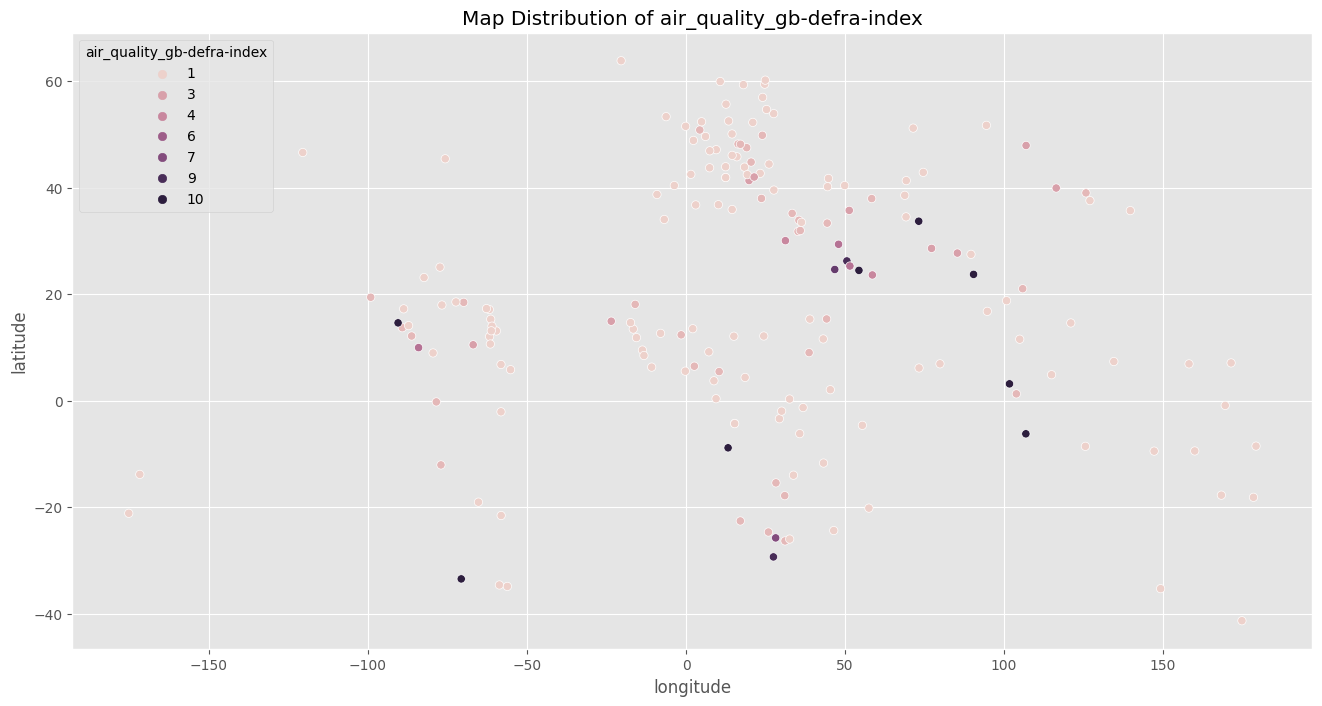

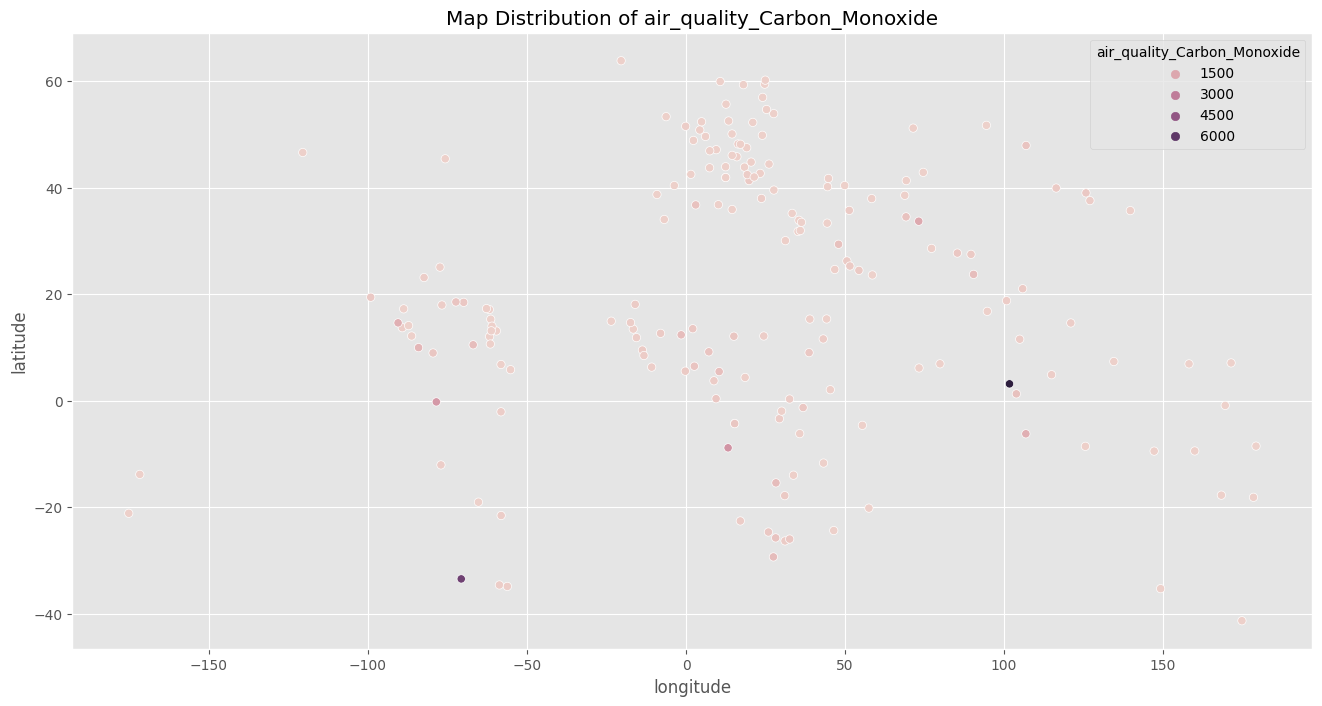

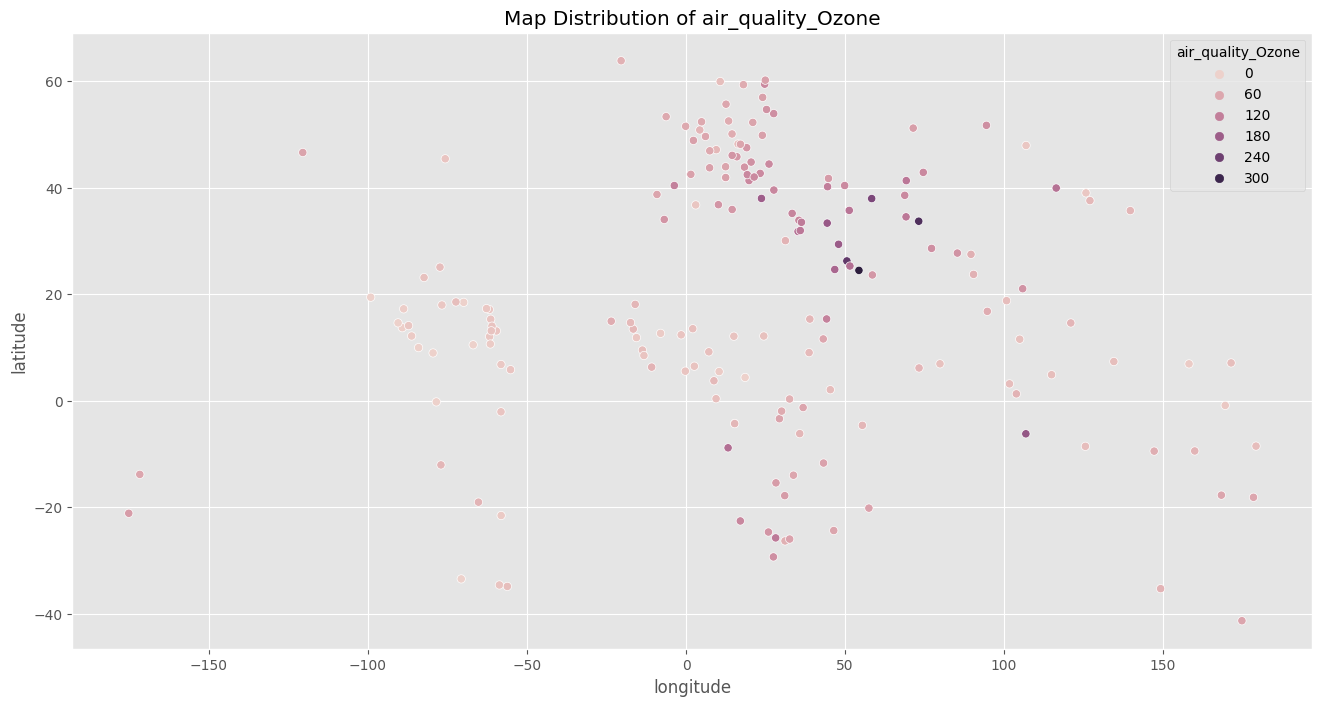

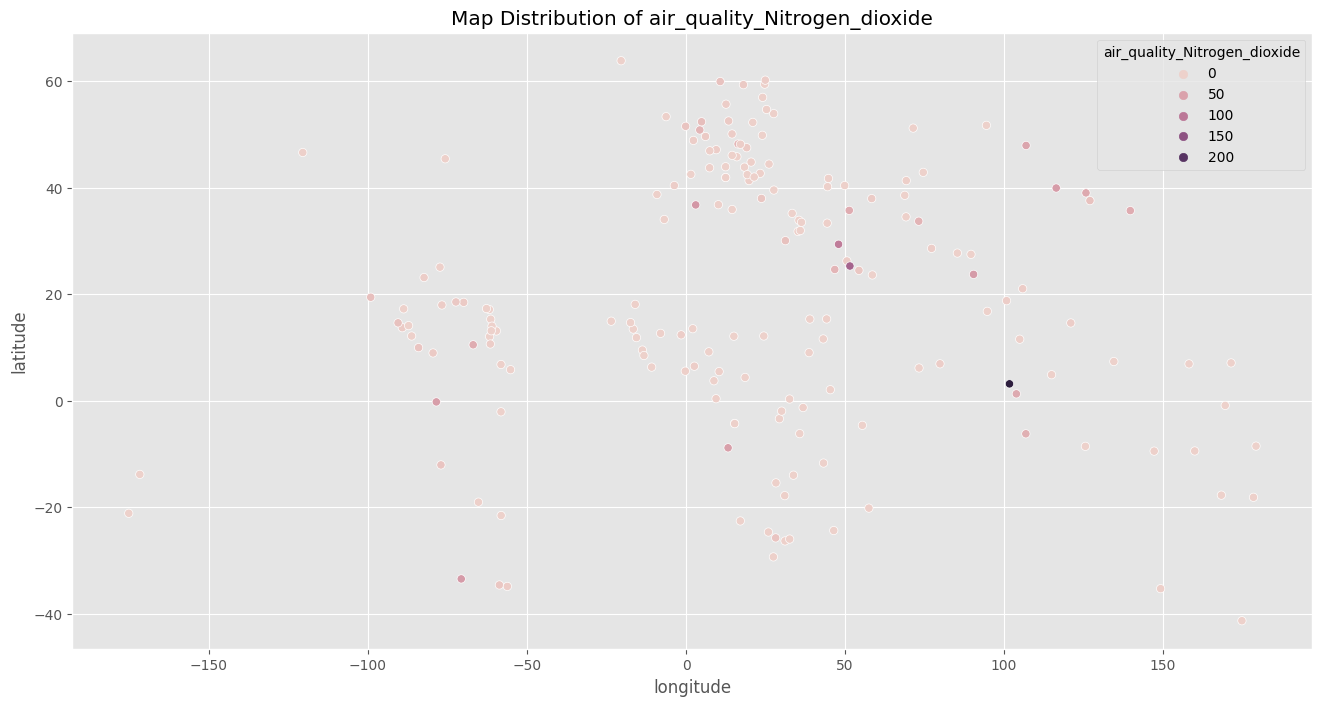

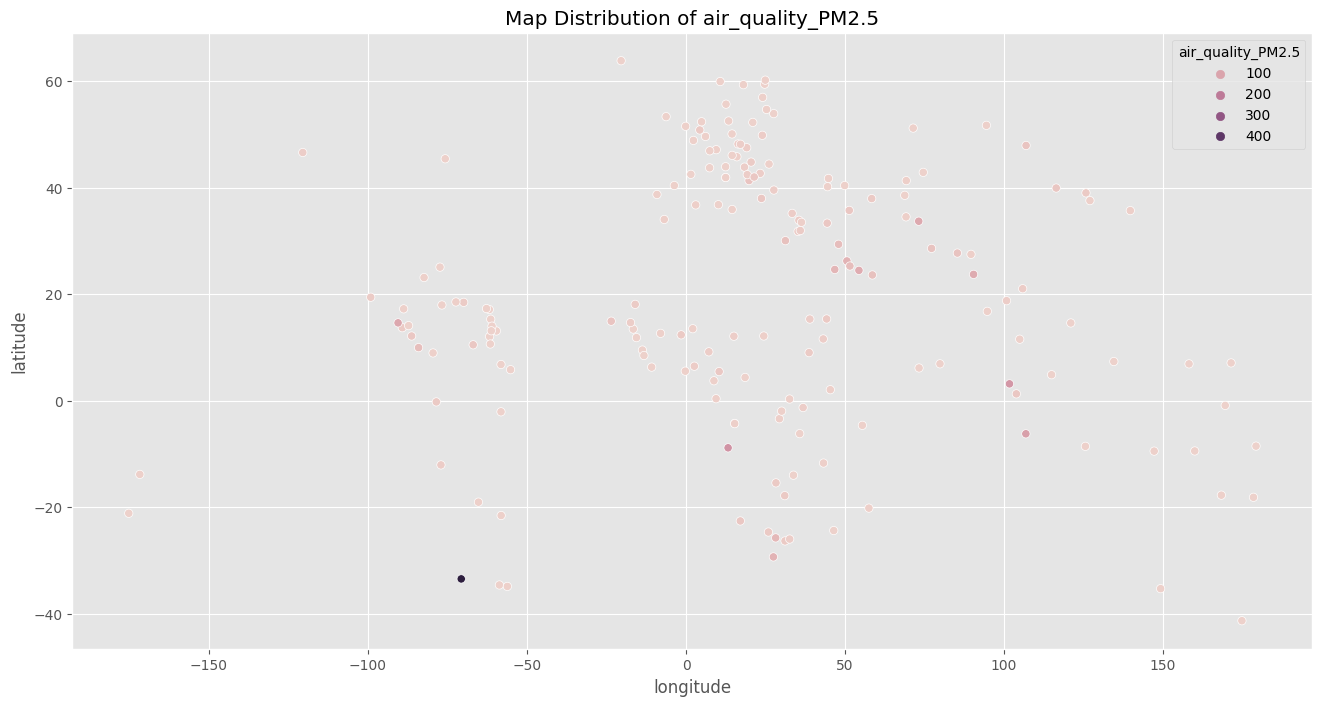

In [41]:
for x in ['air_quality_gb-defra-index', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5']:
    plt.figure(figsize=(16, 8))
    sns.scatterplot(x='longitude', y='latitude', hue=x, data=data)
    plt.title(f'Map Distribution of {x}')
    plt.show()  # Added to display each plot individually

***Performing one-hot encoding for all categorical columns***

In [42]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the updated DataFrame
print(data_encoded.head())


   latitude  longitude  last_updated_epoch  temperature_celsius  \
0     34.52      69.18          1693301400                 28.8   
1     41.33      19.82          1693301400                 27.0   
2     36.76       3.05          1693301400                 28.0   
3     42.50       1.52          1693301400                 10.2   
4     -8.84      13.23          1693301400                 25.0   

   temperature_fahrenheit  wind_mph  wind_kph  wind_degree  pressure_mb  \
0                    83.8       7.2      11.5           74         1004   
1                    80.6       3.8       6.1          210         1006   
2                    82.4       8.1      13.0          240         1014   
3                    50.4       6.0       9.7          345         1015   
4                    77.0       2.2       3.6          270         1016   

   pressure_in  precip_mm  precip_in  humidity  cloud  feels_like_celsius  \
0        29.64        0.0        0.0        19      0                

In [43]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix='location_name')

# Display the updated DataFrame
print(data_encoded.head())


       country  latitude  longitude        timezone  last_updated_epoch  \
0  Afghanistan     34.52      69.18      Asia/Kabul          1693301400   
1      Albania     41.33      19.82   Europe/Tirane          1693301400   
2      Algeria     36.76       3.05  Africa/Algiers          1693301400   
3      Andorra     42.50       1.52  Europe/Andorra          1693301400   
4       Angola     -8.84      13.23   Africa/Luanda          1693301400   

       last_updated  temperature_celsius  temperature_fahrenheit  \
0  29-08-2023 14:00                 28.8                    83.8   
1  29-08-2023 11:30                 27.0                    80.6   
2  29-08-2023 10:30                 28.0                    82.4   
3  29-08-2023 11:30                 10.2                    50.4   
4  29-08-2023 10:30                 25.0                    77.0   

  condition_text  wind_mph  wind_kph  wind_degree wind_direction  pressure_mb  \
0          Sunny       7.2      11.5           74          

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame with both numerical and categorical columns
# Adjust this based on your actual column names and dataset
data = pd.read_csv('/kaggle/input/weather/worldweather.csv')

# Perform one-hot encoding for the entire dataset
data_encoded = pd.get_dummies(data)

# Display the updated DataFrame
print(data_encoded.head())


***Splitting the data into features (X) and target variable (y)***

In [45]:
X = data[['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_PM2.5', 'location_name']]
y = data['air_quality_gb-defra-index']

***Splitting the data into training and testing sets***

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Displaying x train values***


In [47]:
X_train

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_PM2.5,location_name
5391,1401.9,128.8,131.7,Islamabad
11012,1001.4,8.7,33.9,Antananarivo
3429,201.9,38.3,16.9,Podgorica
14947,220.3,52.9,4.2,Lima
6599,1001.4,0.0,33.8,Bangkok
...,...,...,...,...
21575,363.8,45.4,0.9,Carreria
5390,300.4,31.5,46.3,Muscat
860,240.3,97.3,18.4,Baghdad
15795,205.3,97.3,5.1,Nassau


***Displaying x test values***

In [48]:
X_test

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_PM2.5,location_name
866,207.0,43.3,20.5,Amman
25523,237.0,121.6,19.8,Abu Dhabi
24342,8117.7,0.0,279.3,Bangkok
17962,293.7,0.1,1.5,Bangui
23206,387.2,103.0,44.9,Manama
...,...,...,...,...
9607,380.5,20.4,5.6,Libreville
5045,263.7,25.0,17.5,Lom
7286,560.8,16.1,14.5,Baghdad
15013,183.6,27.9,0.5,Canberra


***Displaying y train values***

In [49]:
y_train

5391     10
11012     3
3429      2
14947     1
6599      3
         ..
21575     1
5390      5
860       2
15795     1
23654     6
Name: air_quality_gb-defra-index, Length: 21363, dtype: int64

***Displaying y test values***

In [50]:
y_test

866       2
25523     2
24342    10
17962     1
23206     5
         ..
9607      1
5045      2
7286      2
15013     1
26287     1
Name: air_quality_gb-defra-index, Length: 5341, dtype: int64

***Performing One hot Encoding and Label Encoder***

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['country'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['location_name'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['timezone'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['condition_text'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['moon_phase'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['moonset'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['moonrise'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['sunrise'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['sunset'])
data_encoded = pd.get_dummies(data, columns=['location_name'], prefix=['wind_direction'])

***Running the Dataset through Random Forest Classifier Model***

In [52]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Adjust this based on your actual column names and dataset
data = pd.read_csv('/kaggle/input/weather/worldweather.csv')

# Identify the target variable (y) and features (X)
y = data['location_name']
X = data.drop('air_quality_gb-defra-index', axis=1)

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Assuming 'YourTimeColumn' is the column representing time in your dataset
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X_encoded):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Create and train RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

***Calculating F1 Score and Accuracy***

In [54]:
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

F1 Score: 0.9706447385391306
Accuracy: 0.9779775280898877
